# <font size=6 color='voilet'>**Data Visualization on Honey Production dataset.</font><font size=3 color='green'>-Python Project** - 02 (P-2)</font>
<font size=4 color='pink'> ****************************************************************************************************************************** </font>

<p style='text-align: right;'>By: Bheemanagouda</p>

----

<font size=4 color='red'> **Domain:** </font> <font size=3> Food and agriculture </font>

 <font size=4 color='red'> **Objective:** </font>The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and getsome useful conclusions. <font size=3></font>

<font size=4 color='red'> **Attribute Information:** </font>

| SL.No | Column Name    | Description |
| :-----| :------------  | :----------- |
| 1     | numcol       | Number of honey producing colonies |
| 2     | yield persol  | Honey yield per colony. (Unit is pounds). |
| 3     | total prod   | Total production (numcol x yieldpercol). (Unit is pounds) |
| 4     | price per lb  | Refers to average price per pound based on expanded sales. Unit is dollars |
| 5     | prodvalue   |Value of production (total prod x priceperlb). Unit is dollars. |
| 6     | Stocks     | Refers to stocks held by producers. Unit is pounds |
| 7     | Year         | Calendar year |
| 8     | state       | Different states' names. |

----

### <font size=4 color='voilet'>1. Import required libraries and read the dataset.</font>

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reaad the dataset
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### <font size=4 color='voilet'>2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.</font>

In [6]:
# Read the sample of the dataset
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
558,KS,7000.0,44,308000.0,117000.0,2.15,662000.0,2011
76,SD,224000.0,104,23296000.0,13046000.0,0.60,13978000.0,1999
326,NM,7000.0,49,343000.0,113000.0,1.03,353000.0,2005
467,AZ,20000.0,52,1040000.0,562000.0,1.45,1508000.0,2009
311,IL,8000.0,85,680000.0,408000.0,1.84,1251000.0,2005


In [7]:
# Checking the number of rows and columns of the dataframe
df.shape

(626, 8)

In [8]:
# Checking the information of the datafframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [9]:
# Checking for the number of the mising values for all columns.
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [10]:
df.duplicated().sum()

0

### <font size=4 color='voilet'>3. Display the percentage distribution of the data in each year using the pie chart.</font>

In [11]:
# count the occurrences of each unique year
year_counts = df['year'].value_counts()

Text(0.5, 1.0, 'Percentage distribution of data in each year')

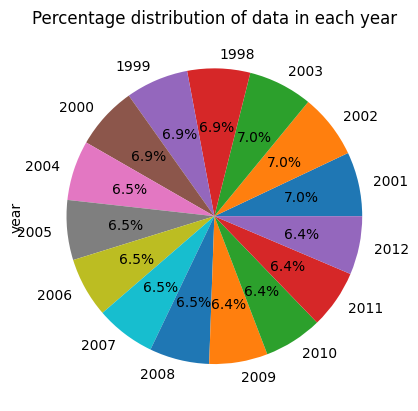

In [12]:
# plot the data as a pie chart
year_counts.plot(kind='pie', autopct='%1.1f%%')

# set the title of the chart
plt.title('Percentage distribution of data in each year')

### <font size=4 color='voilet'>*4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.</font>

Text(0.5, 9.444444444444438, 'priceperlb (in USD)')

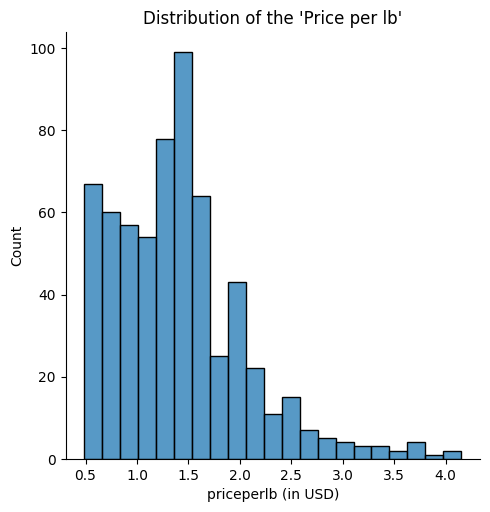

In [32]:
# Plot the distribution of the "price per lb" variable using displot
sns.displot(df['priceperlb'])
plt.title("Distribution of the 'Price per lb'")
plt.xlabel('priceperlb (in USD)')

Based on the plot, we can make the following observations:

- The distribution of 'price per lb' appears to be slightly right-skewed.

- The majority of the values fall within a 0.5 USD and 1.5 USD per pound.

- There are no apparent gaps or unusual patterns in the distribution, suggesting that it is relatively smooth and continuous.

### <font size=4 color='voilet'>5. Plot and understand the relationship between the variables 'numcol' and 'prodvalue' through scatterplot, and write your findings.</font>

Text(0.5, 1.0, 'Relationship between number of colonies and production value')

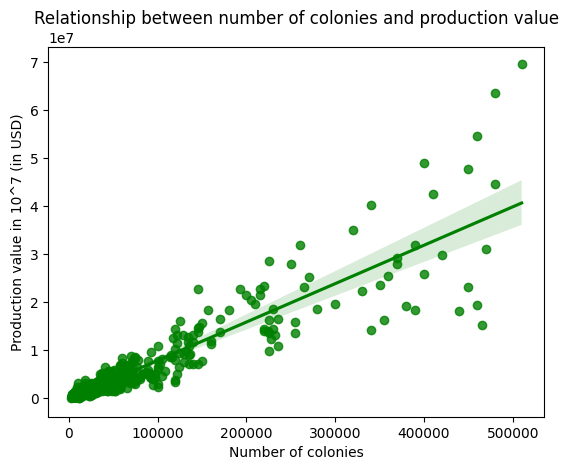

In [30]:
# create scatter plot between the variables 'numcol' and 'prodvalue'
sns.regplot(data=df, x='numcol', y='prodvalue', color='green')
plt.xlabel('Number of colonies')
plt.ylabel('Production value in 10^7 (in USD)')
plt.title('Relationship between number of colonies and production value')

- The scatter plot between 'numcol' and 'prodvalue' shows an upward trend, with the points becoming more scattered as the values increase. 
* The upward trend suggests that as the number of colonies increases, the production value tends to increase as well. This could be due to factors such as increased efficiency of production, economies of scale, or increased demand for the product.

### <font size=4 color='voilet'>*6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.</font>

In [44]:
fig = px.box(df, x='year',y='prodvalue', title="Relationship between Year and Production Value")
fig.update_yaxes(title='Prodvalue (in USD)')
fig.update_layout(title_x=0.5)

Based on the plot, we can make the following observations:

- The median production value appears to be relatively stable over time, with most years falling between 1 and 3.5 million(in USD).

- There is significant variability in production value across years, as indicated by the range of values in the boxplots and the presence of outliers.

- There are a few years (such as 2010, 2011 and 2012) where the median production value appears to be significantly higher than other years.


### <font size=4 color='voilet'>*7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')</font>

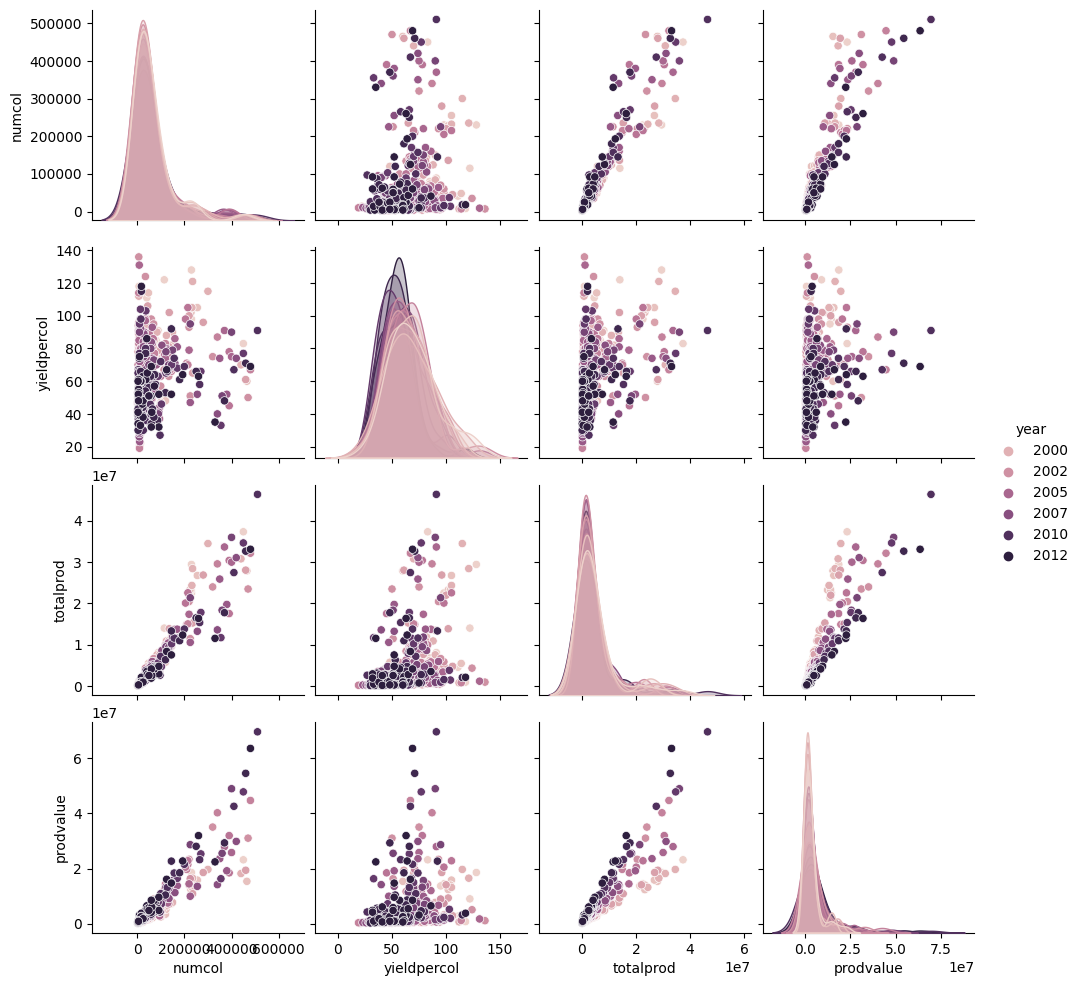

In [16]:
# create pairplot
sns.pairplot(df, vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue'], hue='year')

Based on the pairplot, we can make fallowing observations.
- The scatter plot between 'numcol' and 'totalprod' shows an strongest positive relation and upward trend, the scattered points indicates that as the number of colonies increases, the total production of honey also increases.
- The scatter plot between 'numcol' and 'prodvalue' shows an near to the strongest positive relation and upward trend, the scattered points indicates that as the number of colonies increases, productionvalue of honey also increases.
- The scatter plot between 'yieldpersol' and 'totalprod' shows slight positive or  no relation, the scattered points are scattered all around which indicates no relation.
- The diagonal of the pairplot shows a histogram, that is a univariate distribution of the attributes.

### <font size=4 color='voilet'>8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')</font>

<Axes: >

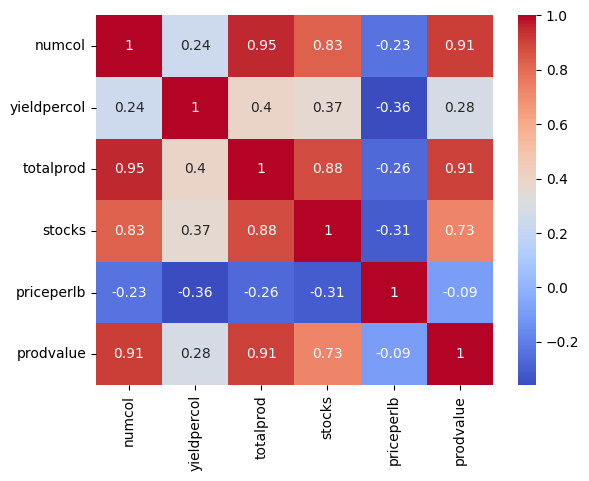

In [17]:
cols = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']

# create correlation matrix
corr_matrix = df[cols].corr()

# create heatmap plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

###### Here are some inferences that can be made from this plot:

- The strongest positive correlation is between 'numcol' and 'totalprod', which is expected since a higher number of colonies would produce more honey. Similarly, there is a strong positive correlation between 'totalprod' and 'prodvalue', since more honey produced would result in a higher production value.
- 'priceperlb' is negatively correlated with 'numcol', 'yeildpersol', 'totalprod','stocks' and 'prodvalue', which makes sense since an increase in production would lead to a surplus of honey, decreasing its price.